                                                Accident Data Analysis(2000-2024)                                                          
                                                                                                                    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)   # Show all columns


In [3]:
df=pd.read_csv('mm_dirty.csv')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18804\1538703751.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('mm_dirty.csv')


In [4]:
df.head(10)

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Age Group,Driver Gender,Driver Alcohol Level,Driver Fatigue,Vehicle Condition,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002.0,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1.0,37.0,18-25,Male,0.051921,0.0,Poor,1.0,NaN,Moderate,8.0,2.0,58.625720,7412.752760,Wet,Weather,4.0,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014.0,December,Saturday,Evening,Urban,NaN,Windy,168.311358,3.0,96.0,NaN,Female,0.234893,1.0,Poor,1.0,1.0,Minor,6.0,1.0,58.041380,4458.628820,Snow-covered,Mechanical Failure,3.0,6486.600073,9534.399441,North America,2333.916224
2,USA,NaN,July,Sunday,Afternoon,Urban,Highway,Snowy,NaN,NaN,62.0,41-60,Male,0.142366,0.0,NaN,0.0,0.0,Moderate,13.0,4.0,42.374452,9856.915064,Wet,Speeding,4.0,29164.412982,58009.145124,South America,4408.889129
3,UK,2017.0,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2.0,78.0,18-25,Male,0.120815,1.0,Good,2.0,0.0,Minor,6.0,3.0,48.554014,4958.646267,Icy,Distracted Driving,3.0,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002.0,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1.0,98.0,41-60,Male,0.155842,1.0,Poor,0.0,1.0,Moderate,13.0,4.0,18.318250,3843.191463,Icy,Distracted Driving,8.0,15605.293921,13584.060759,South America,3883.645634
5,India,2010.0,May,Monday,Evening,Urban,Street,Snowy,479.216834,2.0,30.0,18-25,Male,0.084002,1.0,Moderate,NaN,2.0,Severe,10.0,4.0,8.205994,360.951795,Dry,Speeding,7.0,40980.718164,45995.605252,South America,3626.074027
6,China,2010.0,March,NaN,Afternoon,Rural,Street,Foggy,386.176217,3.0,92.0,41-60,Male,0.075293,0.0,Poor,2.0,1.0,Moderate,10.0,3.0,17.851663,7607.804705,Wet,Weather,9.0,47248.020238,52342.431806,Asia,3408.182341
7,USA,NaN,July,Friday,Afternoon,Rural,Main Road,Foggy,75.608688,3.0,61.0,26-40,Male,0.051611,0.0,Good,1.0,1.0,Minor,6.0,2.0,46.740367,6061.407002,Dry,Speeding,8.0,4262.755621,70652.223517,South America,408.296453
8,Japan,2014.0,August,Thursday,Afternoon,Rural,Highway,Rainy,387.828675,3.0,106.0,26-40,Male,0.159768,1.0,Poor,1.0,2.0,Minor,4.0,2.0,26.543610,3793.850542,Snow-covered,Mechanical Failure,5.0,37624.775981,13724.630950,Europe,2058.898279
9,USA,2007.0,April,Monday,Evening,Urban,Highway,Foggy,443.965408,3.0,74.0,18-25,Male,0.097621,1.0,Moderate,1.0,0.0,Minor,2.0,3.0,44.693355,1140.429308,Snow-covered,Distracted Driving,0.0,15801.190076,61948.862751,Australia,1840.206143


In [5]:
l=df.columns
for i in l:
    print(df[i].unique())
    print()

['USA' 'UK' 'Canada' 'India' 'China' 'Japan' 'Russia' 'Brazil' 'Germany'
 nan 'Australia']

[2002.0 2014.0 nan 2017.0 2010.0 2007.0 2005.0 2008.0 2013.0 2009.0 2004.0
 2020.0 2023.0 2018.0 2016.0 2006.0 2024.0 2021.0 2003.0 2011.0 2012.0
 2022.0 2019.0 2001.0 2015.0 2000.0 '2002.0' '2000.0' '2007.0' '2001.0'
 '2021.0' '2005.0' '2015.0' '2014.0' '2006.0' '2013.0' '2023.0' '2019.0'
 '2024.0' '2008.0' '2018.0' '2016.0' '2004.0' '2011.0' '2012.0' '2022.0'
 '2003.0' '2009.0' '2020.0' '2017.0' '2010.0' 'unknown']

['October' 'December' 'July' 'May' 'March' 'August' 'April' 'September'
 'January' nan 'February' 'June' 'November']

['Tuesday' 'Saturday' 'Sunday' 'Monday' nan 'Friday' 'Thursday'
 'Wednesday']

['Evening' 'Afternoon' 'Night' 'Morning' nan]

['Rural' 'Urban' nan]

['Street' nan 'Highway' 'Main Road']

['Windy' 'Snowy' 'Clear' 'Rainy' 'Foggy' nan]

[220.41465054 168.31135811          nan ...  74.11210176 276.61256528
 253.53137987]

[ 1.  3. nan  2.  4.]

[ 37.  96.  62.  78.  98.

In [6]:
text_cols = df.select_dtypes(include=['object']).columns
garbage = ["nan"," "]
for col in text_cols:
    df[col] = df[col].replace(garbage, np.nan)


In [7]:
l=df.select_dtypes(include=['object'])
for i in l:
    print(df[i].unique())
    print()

['USA' 'UK' 'Canada' 'India' 'China' 'Japan' 'Russia' 'Brazil' 'Germany'
 nan 'Australia']

[2002.0 2014.0 nan 2017.0 2010.0 2007.0 2005.0 2008.0 2013.0 2009.0 2004.0
 2020.0 2023.0 2018.0 2016.0 2006.0 2024.0 2021.0 2003.0 2011.0 2012.0
 2022.0 2019.0 2001.0 2015.0 2000.0 '2002.0' '2000.0' '2007.0' '2001.0'
 '2021.0' '2005.0' '2015.0' '2014.0' '2006.0' '2013.0' '2023.0' '2019.0'
 '2024.0' '2008.0' '2018.0' '2016.0' '2004.0' '2011.0' '2012.0' '2022.0'
 '2003.0' '2009.0' '2020.0' '2017.0' '2010.0' 'unknown']

['October' 'December' 'July' 'May' 'March' 'August' 'April' 'September'
 'January' nan 'February' 'June' 'November']

['Tuesday' 'Saturday' 'Sunday' 'Monday' nan 'Friday' 'Thursday'
 'Wednesday']

['Evening' 'Afternoon' 'Night' 'Morning' nan]

['Rural' 'Urban' nan]

['Street' nan 'Highway' 'Main Road']

['Windy' 'Snowy' 'Clear' 'Rainy' 'Foggy' nan]

['18-25' nan '41-60' '26-40' '<18' '61+']

['Male' 'Female' nan]

['Poor' nan 'Good' 'Moderate']

['Moderate' 'Minor' 'Severe' nan]

[

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df = df.replace("unknown", pd.NA)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18804\615206294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132003 entries, 0 to 132002
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132003 non-null  object 
 1   Year                         131998 non-null  object 
 2   Month                        132003 non-null  object 
 3   Day of Week                  132003 non-null  object 
 4   Time of Day                  132003 non-null  object 
 5   Urban/Rural                  132003 non-null  object 
 6   Road Type                    132003 non-null  object 
 7   Weather Conditions           132003 non-null  object 
 8   Visibility Level             132003 non-null  float64
 9   Number of Vehicles Involved  132003 non-null  float64
 10  Speed Limit                  132003 non-null  float64
 11  Driver Age Group             132003 non-null  object 
 12  Driver Gender                132003 non-null  object 
 13 

In [11]:
l=df.select_dtypes(include=['object'])
for i in l:
    print(df[i].unique())
    print()

['USA' 'UK' 'Canada' 'India' 'China' 'Japan' 'Russia' 'Brazil' 'Germany'
 'Australia']

[2002.0 2014.0 '2016.0' 2017.0 2010.0 2007.0 2005.0 2008.0 2013.0 2009.0
 2004.0 2020.0 2023.0 2018.0 2016.0 2006.0 2024.0 2021.0 2003.0 2011.0
 2012.0 2022.0 2019.0 2001.0 2015.0 2000.0 '2002.0' '2000.0' '2007.0'
 '2001.0' '2021.0' '2005.0' '2015.0' '2014.0' '2006.0' '2013.0' '2023.0'
 '2019.0' '2024.0' '2008.0' '2018.0' '2004.0' '2011.0' '2012.0' '2022.0'
 '2003.0' '2009.0' '2020.0' '2017.0' '2010.0' <NA>]

['October' 'December' 'July' 'May' 'March' 'August' 'April' 'September'
 'January' 'February' 'June' 'November']

['Tuesday' 'Saturday' 'Sunday' 'Monday' 'Wednesday' 'Friday' 'Thursday']

['Evening' 'Afternoon' 'Night' 'Morning']

['Rural' 'Urban']

['Street' 'Main Road' 'Highway']

['Windy' 'Snowy' 'Clear' 'Rainy' 'Foggy']

['18-25' '41-60' '26-40' '<18' '61+']

['Male' 'Female']

['Poor' 'Good' 'Moderate']

['Moderate' 'Minor' 'Severe']

['Wet' 'Snow-covered' 'Icy' 'Dry']

['Weather' 'Mechani

In [12]:
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Age Group,Driver Gender,Driver Alcohol Level,Driver Fatigue,Vehicle Condition,Pedestrians Involved,Cyclists Involved,Accident Severity,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002.0,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1.0,37.0,18-25,Male,0.051921,0.0,Poor,1.0,1.0,Moderate,8.0,2.0,58.625720,7412.752760,Wet,Weather,4.0,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014.0,December,Saturday,Evening,Urban,Main Road,Windy,168.311358,3.0,96.0,18-25,Female,0.234893,1.0,Poor,1.0,1.0,Minor,6.0,1.0,58.041380,4458.628820,Snow-covered,Mechanical Failure,3.0,6486.600073,9534.399441,North America,2333.916224
2,USA,2016.0,July,Sunday,Afternoon,Urban,Highway,Snowy,274.745055,3.0,62.0,41-60,Male,0.142366,0.0,Good,0.0,0.0,Moderate,13.0,4.0,42.374452,9856.915064,Wet,Speeding,4.0,29164.412982,58009.145124,South America,4408.889129
3,UK,2017.0,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2.0,78.0,18-25,Male,0.120815,1.0,Good,2.0,0.0,Minor,6.0,3.0,48.554014,4958.646267,Icy,Distracted Driving,3.0,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002.0,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1.0,98.0,41-60,Male,0.155842,1.0,Poor,0.0,1.0,Moderate,13.0,4.0,18.318250,3843.191463,Icy,Distracted Driving,8.0,15605.293921,13584.060759,South America,3883.645634


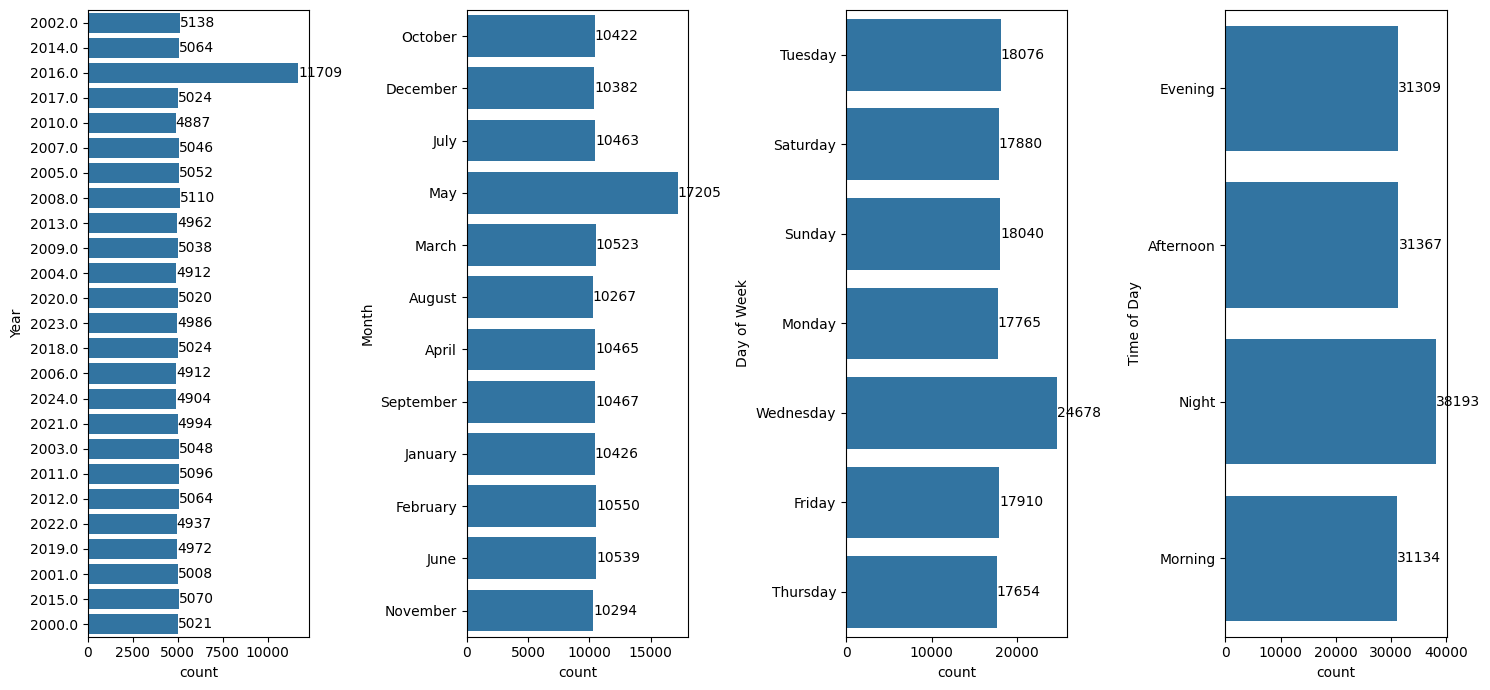

In [13]:
m,ax=plt.subplots(ncols=4,figsize=(15,7))
f=sns.countplot(df,y='Year',ax=ax[0])
for i in f.containers:
    f.bar_label(i)
    plt.tight_layout()

f=sns.countplot(df,y='Month',ax=ax[1])
for i in f.containers:
    f.bar_label(i)
    plt.tight_layout()

f=sns.countplot(df,y='Day of Week',ax=ax[2])
for i in f.containers:
    f.bar_label(i)
    plt.tight_layout()
    
f=sns.countplot(df,y='Time of Day',ax=ax[3])
for i in f.containers:
    f.bar_label(i)
    plt.tight_layout()
plt.show()

* 2016 yeaar  large number of accidents occured
* Most of the accidents are during may month
* Also in a week wednesday is more accidednts occuring
* Night time more accidents are occuring

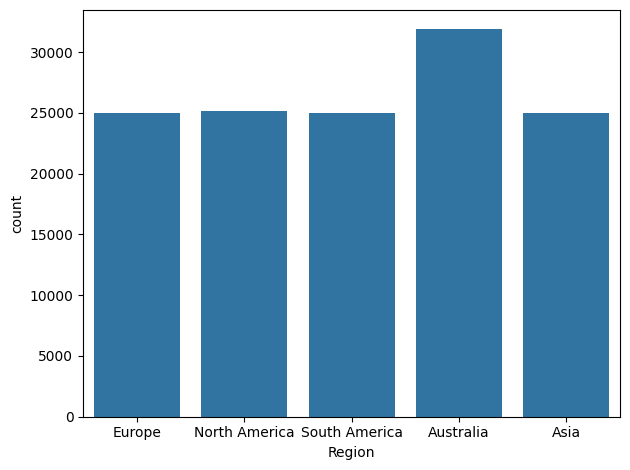

In [14]:
sns.countplot(data=df, x='Region')
plt.tight_layout()


In australia most accidents are occuring

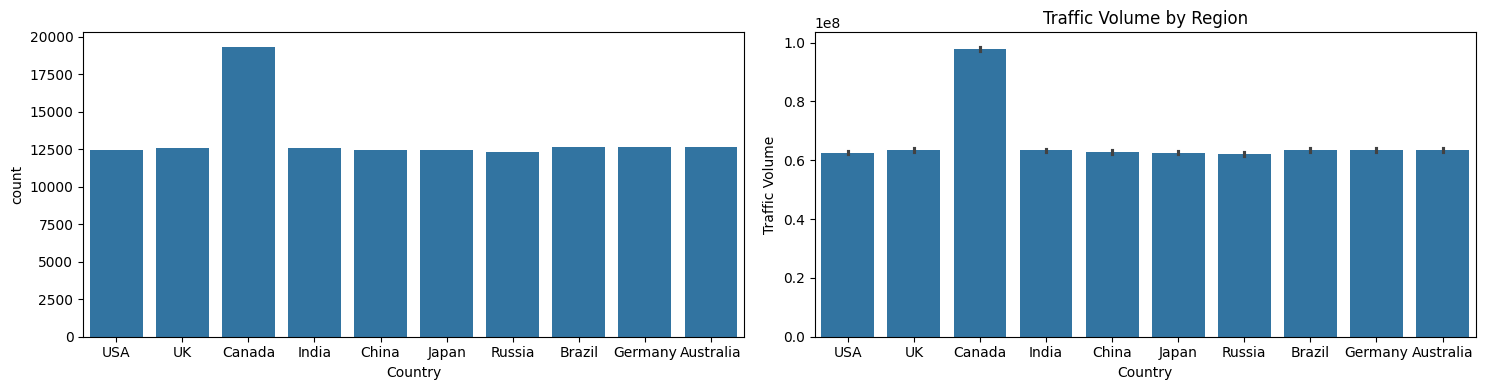

In [15]:
f,a=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(data=df, x='Country',ax=a[0])
plt.title("Accidents by Country")
sns.barplot(data=df, x='Country', y='Traffic Volume',estimator='sum',ax=a[1])
plt.title("Traffic Volume by Region")
plt.tight_layout()
plt.show()

Canada is having the large number of traffic and accident so traffic is one of the reson for accidents

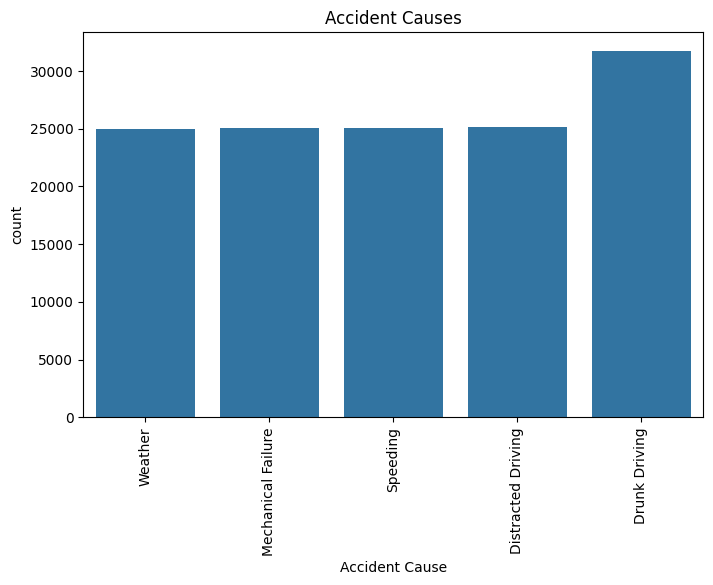

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Accident Cause')
plt.xticks(rotation=90)
plt.title("Accident Causes")
plt.show()


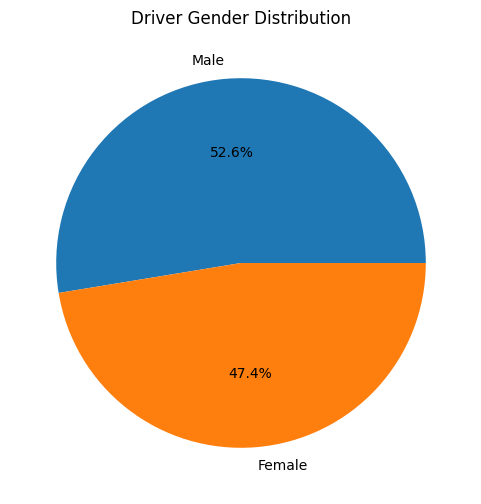

In [17]:
df['Driver Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Driver Gender Distribution")
plt.ylabel("")
plt.show()


more number of males are reason of accident

Most of the accidents are due to  Drunk Driving

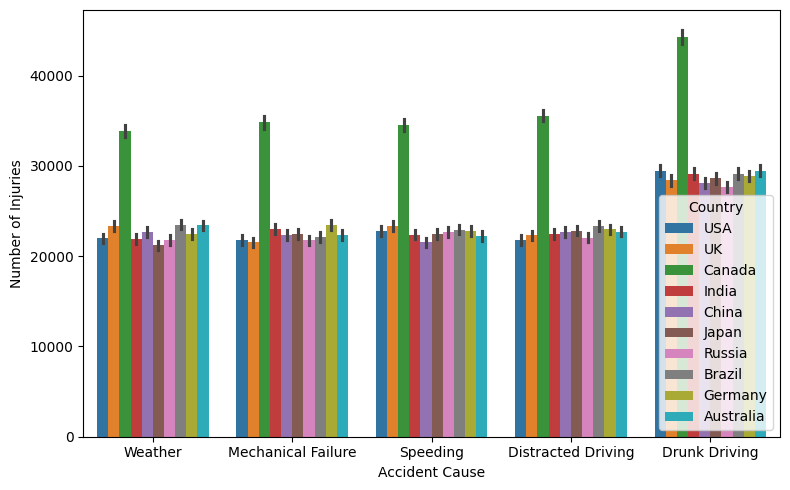

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Accident Cause', y='Number of Injuries',estimator='sum',hue='Country')
plt.tight_layout()
plt.show()


In every country Drunk and driving is the reason of most accidents


In [19]:
df.columns

Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

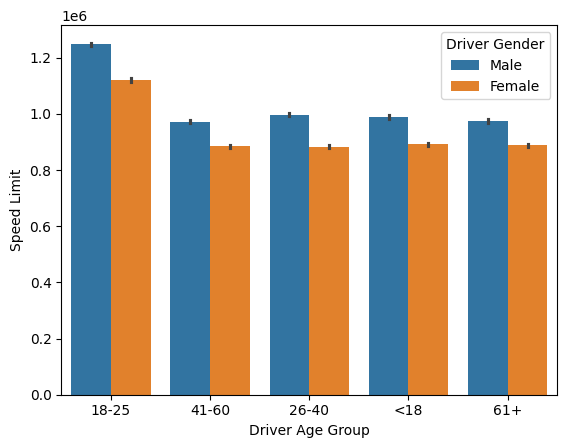

In [20]:
sns.barplot(df,x='Driver Age Group',y='Speed Limit',estimator='sum',hue='Driver Gender')
plt.show()

The range of 18-25 age group people are causing most of the accidents males more in that, others range are same

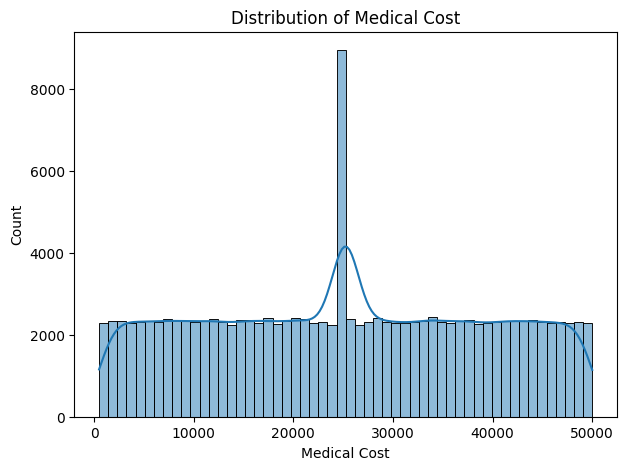

In [21]:
plt.figure(figsize=(7,5))
sns.histplot(df['Medical Cost'], kde=True)
plt.title("Distribution of Medical Cost")
plt.show()


The medical cost values are almost uniformly spread across the entire range but there is a large increase around 25,000

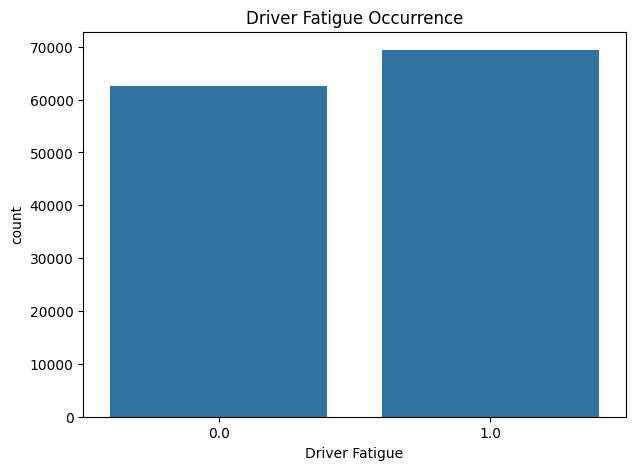

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Driver Fatigue')
plt.title("Driver Fatigue Occurrence")
plt.show()



more accidents happened when the driver was tired than when the driver was not tired

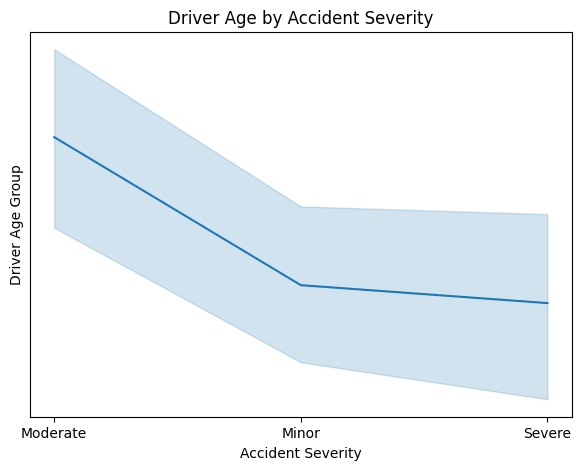

In [23]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Accident Severity', y='Driver Age Group')
plt.title("Driver Age by Accident Severity")
plt.show()


As the drivers age increases accident severity becoming low

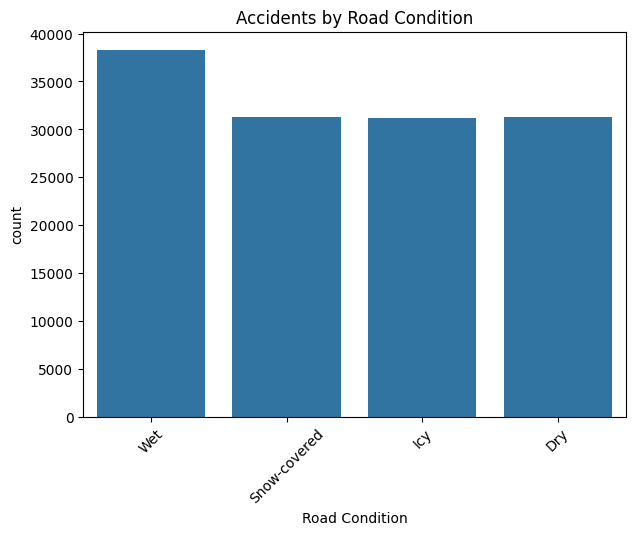

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Road Condition')
plt.xticks(rotation=45)
plt.title("Accidents by Road Condition")
plt.show()


Most of the accidents are due to wet road condition

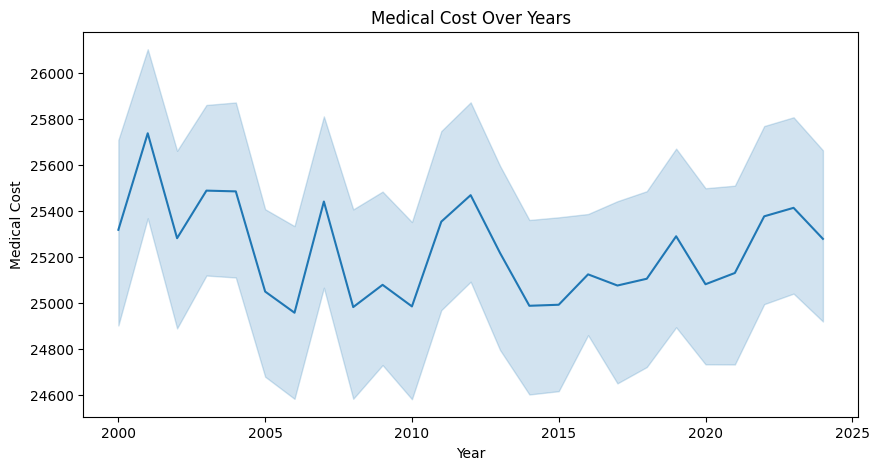

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Medical Cost')
plt.title("Medical Cost Over Years")
plt.show()


The medical cost slightly fluctuates every year ,almost constant over time without any major increase or decrease.

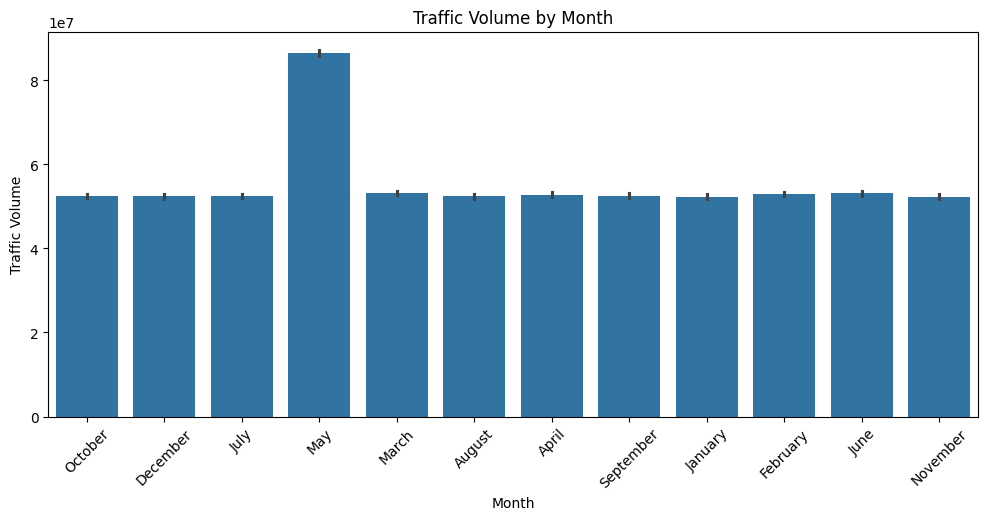

In [26]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Month', y='Traffic Volume',estimator='sum')
plt.xticks(rotation=45)
plt.title("Traffic Volume by Month")
plt.show()


May month more Traffic is There

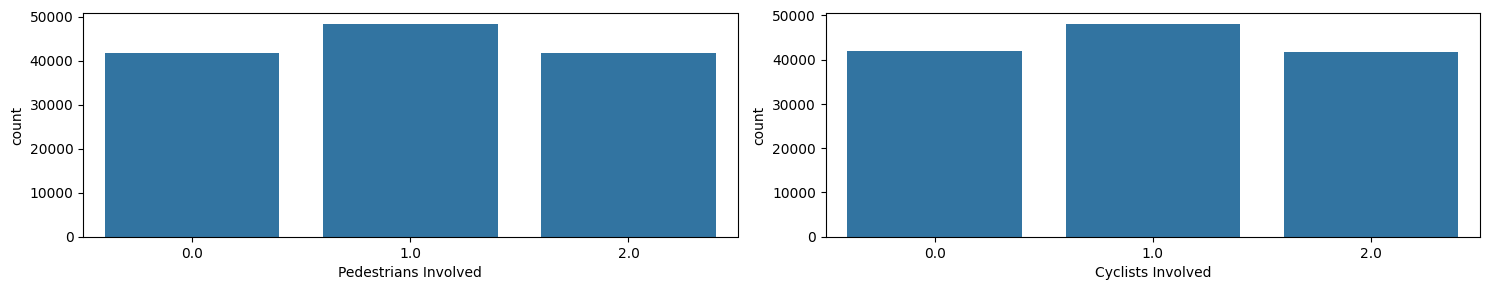

In [27]:
a,x=plt.subplots(ncols=2,figsize=(15,3))
sns.countplot(df,x='Pedestrians Involved',ax=x[0])
sns.countplot(df,x='Cyclists Involved',ax=x[1])
plt.tight_layout()
plt.show()

Most of the time accident happening 1 pedestrian or 1 cyclist is involving

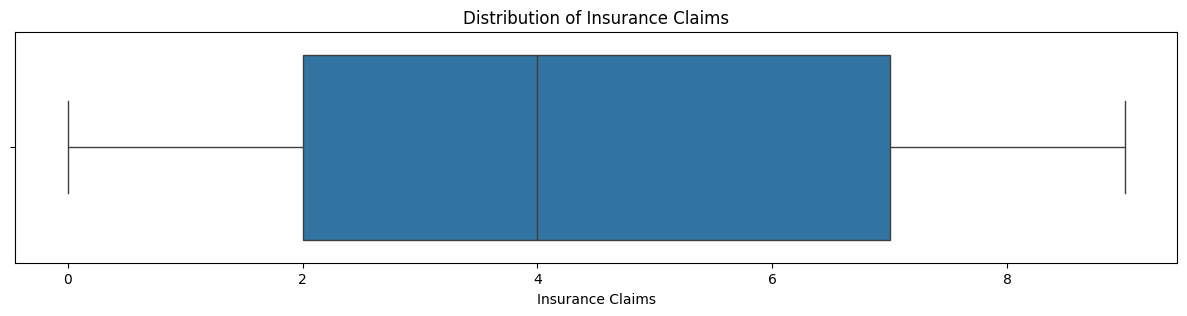

In [28]:
plt.figure(figsize=(15,3))
sns.boxplot(df,x='Insurance Claims')
plt.title("Distribution of Insurance Claims")
plt.show()

most insurance claim values fall between 2 and 7, with a median around 4, and very few extreme values on either side.

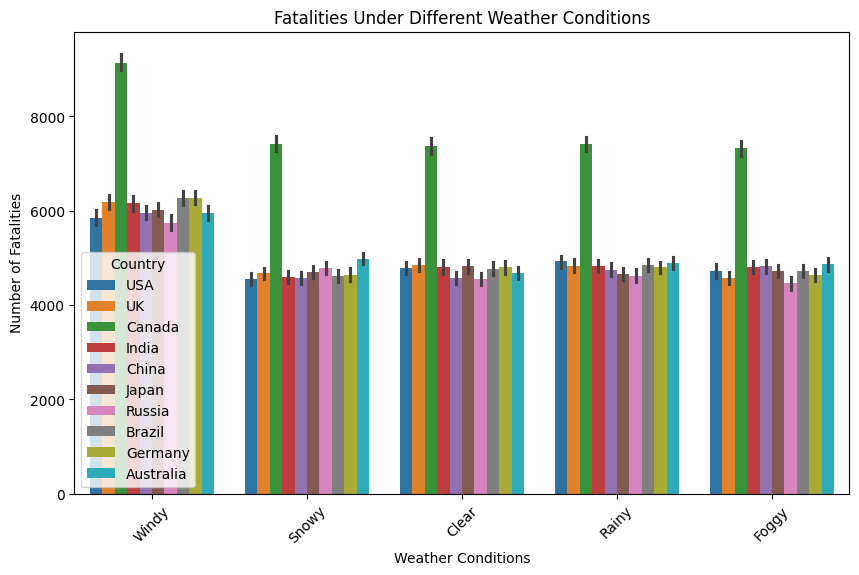

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Weather Conditions', y='Number of Fatalities',estimator='sum',hue='Country')
plt.xticks(rotation=45)
plt.title("Fatalities Under Different Weather Conditions")
plt.show()


In every country most of the time accident is happening due to windy weather

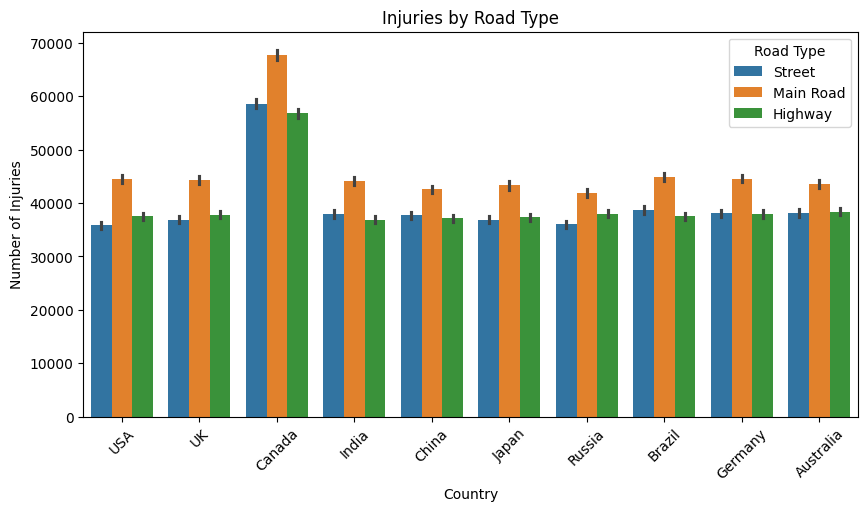

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, hue='Road Type', y='Number of Injuries',estimator='sum',x='Country')
plt.xticks(rotation=45)
plt.title("Injuries by Road Type")
plt.show()


In every country most of the accidents are happening in main road

In [31]:
df['Number of Injuries'].mean().round()


np.float64(9.0)

average of 9 people are getting injured due to accidents

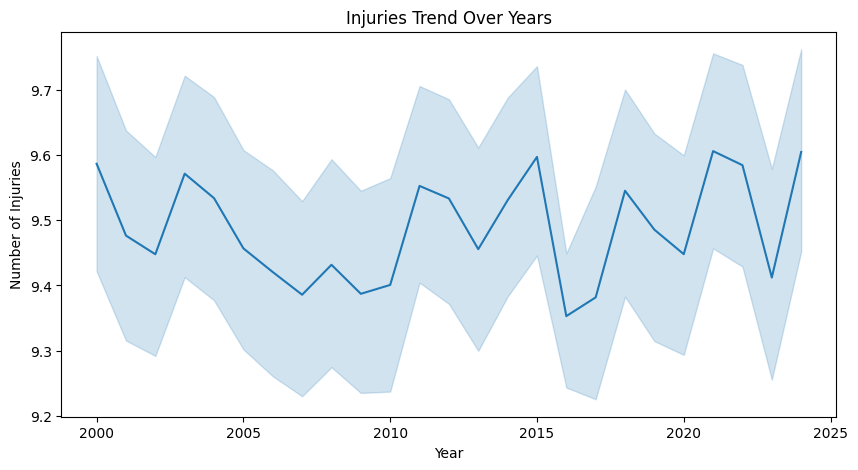

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Number of Injuries')
plt.title("Injuries Trend Over Years")
plt.show()




Over these years number of injuries are increasing and decreasing , time is not effecting count of accidents

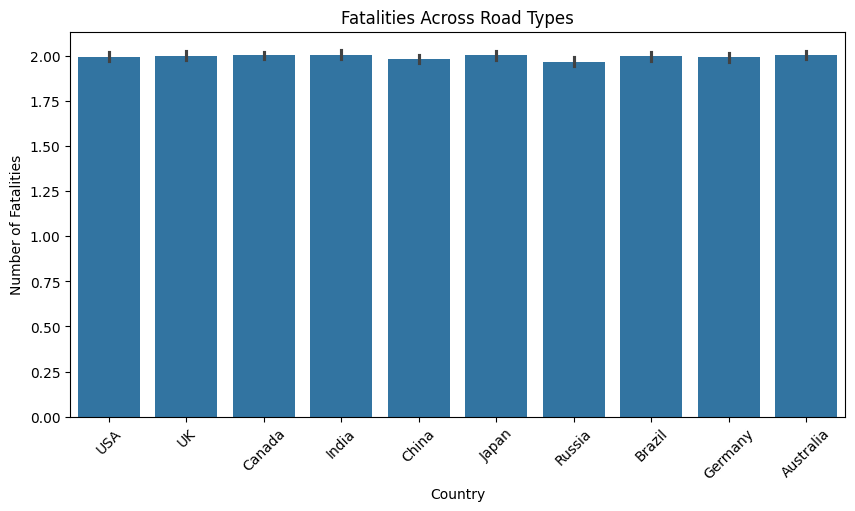

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Country', y='Number of Fatalities')
plt.xticks(rotation=45)
plt.title("Fatalities Across Road Types")
plt.show()

Average death due to accidents in every country is same

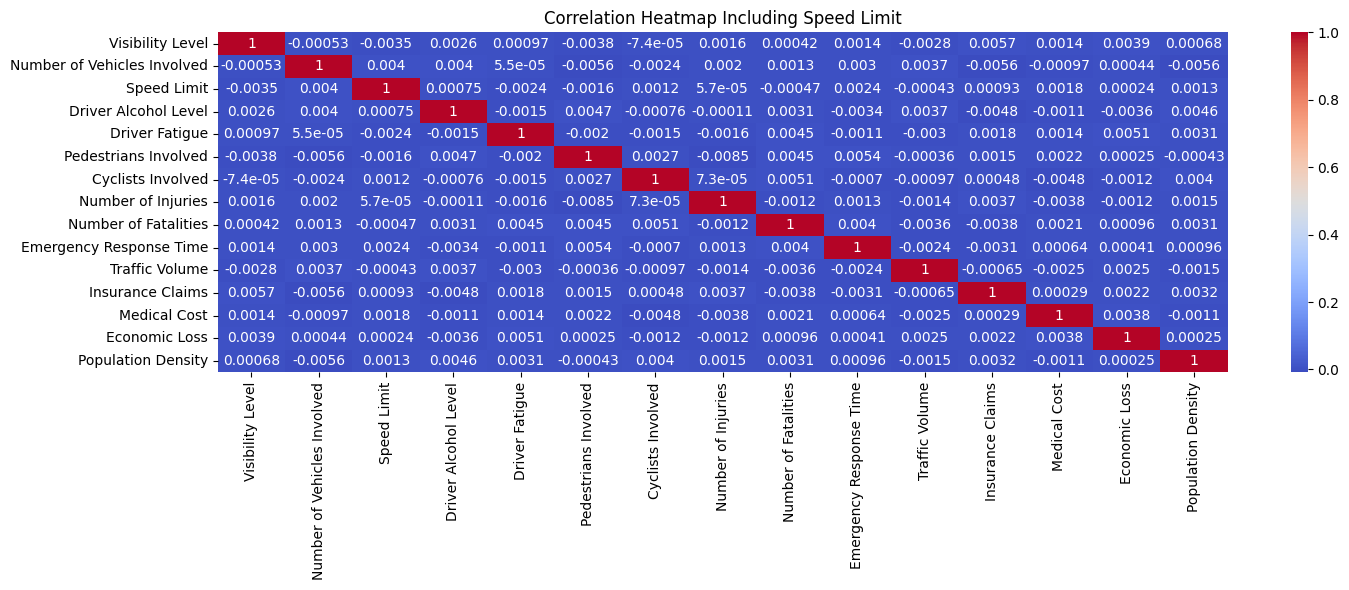

In [34]:


plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Including Speed Limit")
plt.tight_layout()
plt.show()



No numeric factor is strongly related to any other all correlations are extremely weak

                                                        Conclusion                                                                         

* The analysis shows that most numeric factors—like medical cost, economic loss, speed limit, traffic volume, injuries, and fatalities—do not have strong relationships with each other. 
* Accident patterns are mostly influenced by categorical factors such as weather, country, time of day, and driver fatigue.
* Canada showed the highest accident counts, and fatigued drivers had slightly more accidents. 
* Overall indicates that accidents arise from multiple independent factors rather than one main cause.

                                                                                                                                        .